### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### Datasets Information:

- Data.csv: It contains information of ratings given by the users to a particular movie. Columns: user id, movie id, rating, timestamp

- item.csv: File contains information related to the movies and its genre.

- Columns: movie id, movie title, release date, unknown, Action, Adventure, Animation, Children’s, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western

- user.csv: It contains information of the users who have rated the movies. Columns: user id, age, gender, occupation, zip code

### Objective:

`To implement the techniques learnt as a part of the course.`

### Learning Outcomes:
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


#### Domain 
`Internet and Entertainment`

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [1]:
# to avoid warnings
import warnings 
warnings.filterwarnings("ignore") 
# To import the necessary libraries.
import numpy as np    
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from matplotlib import style
# To enable plotting graphs in Jupyter notebook
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')


#### 2. Read the 3 datasets into dataframes - 2.5 marks

# Reading Datasets.

In [2]:
# the following code to read data from external source into a dataFrame.
users_df=pd.read_csv('user.csv') 
names=['user id', 'gender', 'age', 'occupation', 'zip code'],
users_df.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [6]:
# the following code to read data from external source into a dataFrame.
movies_df= pd.read_csv("item.csv")
names=['user id', 'movie title', 'genres' 'timestamp'],
movies_df.head().T

,0,1,2,3,4
movie id,1,2,3,4,5
movie title,Toy Story,GoldenEye,Four Rooms,Get Shorty,Copycat
release date,1-Jan-95,1-Jan-95,1-Jan-95,1-Jan-95,1-Jan-95
unknown,0,0,0,0,0
Action,0,1,0,1,0
Adventure,0,1,0,0,0
Animation,1,0,0,0,0
Childrens,1,0,0,0,0
Comedy,1,0,0,1,0
Crime,0,0,0,0,1


In [10]:
# The following code to check duplicates in the datasets.
# The following code to check duplicates in the datasets
dupes = movies_df.duplicated()
sum(dupes)
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [7]:
# this code to read data from external source into a dataFrame.
ratings_df= pd.read_csv('data.csv') 
names=['user id', 'movie id', 'rating', 'timestamp'],
ratings_df.head().T


,0,1,2,3,4
user id,196,186,22,244,166
movie id,242,302,377,51,346
rating,3,3,1,2,1
timestamp,881250949,891717742,878887116,880606923,886397596


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

## Analyzing datasets by applying info, shape, and describe.

In [9]:
# the following code displays Data Types of the dataset. 
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [10]:
# the follwoing code displays how much data contains in the datasets.
movies_df.shape

(1681, 22)

In [11]:
# the following code to display basics statistics of the dataset.
movies_df.describe().T

,count,mean,std,min,25%,50%,75%,max
movie id,1681.0,841.841761,485.638077,1.0,422.0,842.0,1262.0,1682.0
unknown,1681.0,0.000595,0.024390,0.0,0.0,0.0,0.0,1.0
Action,1681.0,0.149316,0.356506,0.0,0.0,0.0,0.0,1.0
Adventure,1681.0,0.080309,0.271852,0.0,0.0,0.0,0.0,1.0
Animation,1681.0,0.024985,0.156126,0.0,0.0,0.0,0.0,1.0
Childrens,1681.0,0.072576,0.259516,0.0,0.0,0.0,0.0,1.0
Comedy,1681.0,0.300416,0.458576,0.0,0.0,0.0,1.0,1.0
Crime,1681.0,0.064842,0.246321,0.0,0.0,0.0,0.0,1.0
Documentary,1681.0,0.029744,0.169931,0.0,0.0,0.0,0.0,1.0
Drama,1681.0,0.431291,0.495404,0.0,0.0,0.0,1.0,1.0


In [12]:
# the following code displays Data Types of the dataset. 
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [13]:
# the follwoing code displays how much data contains in the datasets.
ratings_df.shape

(100000, 4)

In [14]:
# the following code displays basics statistics of the dataset.
ratings_df.describe().T

,count,mean,std,min,25%,50%,75%,max
user id,100000.0,4.624848e+02,2.666144e+02,1.0,254.0,447.0,682.0,943.0
movie id,100000.0,4.255301e+02,3.307984e+02,1.0,175.0,322.0,631.0,1682.0
rating,100000.0,3.529860e+00,1.125674e+00,1.0,3.0,4.0,4.0,5.0
timestamp,100000.0,8.835289e+08,5.343856e+06,874724710.0,879448709.5,882826944.0,888259984.0,893286638.0


# Data Cleaning of Duplicates Missing Values.

    * Checking for any duplicates
    * Droping dulicates if any.
    
    


In [15]:
##Identify duplicates records in the data
movies_df.drop_duplicates(inplace=True)

# Droping Duplicates.
movies_df.drop_duplicates(inplace=True)
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [20]:
# The following code to check duplicates in the datasets.
dupes = users_df.duplicated()
sum(dupes) 

# Droping Duplicates.
users_df.drop_duplicates(inplace=True)
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 44.2+ KB


In [18]:
# The following code to check duplicates in the datasets.
dupes = ratings_df.duplicated()
sum(dupes) 

# Droping Duplicates.
ratings_df.drop_duplicates(inplace=True)
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.8 MB


In [20]:
# the following code to check missing values in the datasets. 
movies_df.isnull().any().sum()

0

In [21]:
# the following code to check missing values in the datasets
ratings_df.isnull().any().sum()

0

In [19]:
# the following code to check missing values in the datasets
users_df.isnull().any().sum()

0

## All above variables i need for my analysis have null entries.

# Merging DataFrames.
    * First I have merged two data frames (user_df) and (ratings_df) by (user id). 
    * Second I have merged three data frames (movies_ratings_users_df) by (movie id).

In [24]:
# The following code to merge two dataframes users & ratings datersets by index= userID.
users_ratings_df=pd.merge(users_df,ratings_df,how='outer',on='user id')[['user id','gender','movie id', 'rating']]
users_ratings_df

,user id,gender,movie id,rating
0,1,M,61,4
1,1,M,189,3
2,1,M,33,4
3,1,M,160,4
4,1,M,20,4
...,...,...,...,...
99995,943,M,415,1
99996,943,M,219,4
99997,943,M,796,3
99998,943,M,739,4


In [25]:
# the following code merging two dataframes movies & ratings datersets by index= movieID.
movies_ratings_df = pd.merge(movies_df, ratings_df, on='movie id')
movies_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99991 entries, 0 to 99990
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      99991 non-null  int64 
 1   movie title   99991 non-null  object
 2   release date  99991 non-null  object
 3   unknown       99991 non-null  int64 
 4   Action        99991 non-null  int64 
 5   Adventure     99991 non-null  int64 
 6   Animation     99991 non-null  int64 
 7   Childrens     99991 non-null  int64 
 8   Comedy        99991 non-null  int64 
 9   Crime         99991 non-null  int64 
 10  Documentary   99991 non-null  int64 
 11  Drama         99991 non-null  int64 
 12  Fantasy       99991 non-null  int64 
 13  Film-Noir     99991 non-null  int64 
 14  Horror        99991 non-null  int64 
 15  Musical       99991 non-null  int64 
 16  Mystery       99991 non-null  int64 
 17  Romance       99991 non-null  int64 
 18  Sci-Fi        99991 non-null  int64 
 19  Thri

In [26]:
#the following code merging three dataframes movies_ratings_users_df by index= userID.
movies_ratings_users_df = pd.merge(movies_ratings_df, users_df,on='user id')[['user id','gender','movie id','movie title','release date','rating','Drama','Romance','Sci-Fi']]
movies_ratings_users_df.head()

,user id,gender,movie id,movie title,release date,rating,Drama,Romance,Sci-Fi
0,308,M,1,Toy Story,1-Jan-95,4,0,0,0
1,308,M,4,Get Shorty,1-Jan-95,5,1,0,0
2,308,M,5,Copycat,1-Jan-95,4,1,0,0
3,308,M,7,Twelve Monkeys,1-Jan-95,4,1,0,1
4,308,M,8,Babe,1-Jan-95,5,1,0,0


In [27]:
movies_ratings_users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99991 entries, 0 to 99990
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user id       99991 non-null  int64 
 1   gender        99991 non-null  object
 2   movie id      99991 non-null  int64 
 3   movie title   99991 non-null  object
 4   release date  99991 non-null  object
 5   rating        99991 non-null  int64 
 6   Drama         99991 non-null  int64 
 7   Romance       99991 non-null  int64 
 8   Sci-Fi        99991 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 7.6+ MB


In [28]:
#The following code to see the new created dataFrames after merging three dataFrames movies_ratings_users_df.
movies_ratings_users_df.head().T

,0,1,2,3,4
user id,308,308,308,308,308
gender,M,M,M,M,M
movie id,1,4,5,7,8
movie title,Toy Story,Get Shorty,Copycat,Twelve Monkeys,Babe
release date,1-Jan-95,1-Jan-95,1-Jan-95,1-Jan-95,1-Jan-95
rating,4,5,4,4,5
Drama,0,1,1,1,1
Romance,0,0,0,0,0
Sci-Fi,0,0,0,1,0


# EDA Descriptive Statistics.

    * Explore Data.
    * Distribution of variables
    * Descriptive Statistics.


# Mean

In [29]:
# print the mean of each attribute. Ignore "movieID. as it is not a continuous variable"
print("movies_ratings_df:",movies_df.mean())  

movies_ratings_df: movie id       841.841761
unknown          0.000595
Action           0.149316
Adventure        0.080309
Animation        0.024985
Childrens        0.072576
Comedy           0.300416
Crime            0.064842
Documentary      0.029744
Drama            0.431291
Fantasy          0.013087
Film-Noir        0.014277
Horror           0.054729
Musical          0.033314
Mystery          0.036288
Romance          0.146936
Sci-Fi           0.060083
Thriller         0.149316
War              0.042237
Western          0.016062
dtype: float64


 # Mode

In [30]:
# Prints the mode of the attribute. 
print(movies_ratings_df['movie id'].mode()) 

0    50
dtype: int64


# Median

In [31]:
# Print the median values of the data. 
print("movies_ratings_df:",movies_ratings_users_df.median()) 
# Observe that the values of mean and median are almost the same for most of the attributes.

movies_ratings_df: user id     447.0
movie id    322.0
rating        4.0
Drama         0.0
Romance       0.0
Sci-Fi        0.0
dtype: float64


# Quantile 25%

In [52]:
 # Prints the value below which 25% of the data lies.
print("movies_ratings_df_quantile(25%):",movies_ratings_df.quantile(q=0.25)) 

movies_ratings_df_quantile(25%): movie id             175.0
unknown                0.0
Action                 0.0
Adventure              0.0
Animation              0.0
Childrens              0.0
Comedy                 0.0
Crime                  0.0
Documentary            0.0
Drama                  0.0
Fantasy                0.0
Film-Noir              0.0
Horror                 0.0
Musical                0.0
Mystery                0.0
Romance                0.0
Sci-Fi                 0.0
Thriller               0.0
War                    0.0
Western                0.0
user id              254.0
rating                 3.0
timestamp      879448759.0
Name: 0.25, dtype: float64


In [55]:
# Prints the value below which 50% of the data lie.
print("movies_ratings_df_quantile(50%):",movies_ratings_df.quantile(q=0.50))  

movies_ratings_df_quantile(50%): movie id             322.0
unknown                0.0
Action                 0.0
Adventure              0.0
Animation              0.0
Childrens              0.0
Comedy                 0.0
Crime                  0.0
Documentary            0.0
Drama                  0.0
Fantasy                0.0
Film-Noir              0.0
Horror                 0.0
Musical                0.0
Mystery                0.0
Romance                0.0
Sci-Fi                 0.0
Thriller               0.0
War                    0.0
Western                0.0
user id              447.0
rating                 4.0
timestamp      882826983.0
Name: 0.5, dtype: float64


# Quantile 75%

In [56]:
# Prints the value below which 75% of the data lies.
print("movies_ratings_df_quantile(75%):",movies_ratings_df.quantile(q=0.75))  

movies_ratings_df_quantile(75%): movie id             631.0
unknown                0.0
Action                 1.0
Adventure              0.0
Animation              0.0
Childrens              0.0
Comedy                 1.0
Crime                  0.0
Documentary            0.0
Drama                  1.0
Fantasy                0.0
Film-Noir              0.0
Horror                 0.0
Musical                0.0
Mystery                0.0
Romance                0.0
Sci-Fi                 0.0
Thriller               0.0
War                    0.0
Western                0.0
user id              682.0
rating                 4.0
timestamp      888259984.0
Name: 0.75, dtype: float64


## Plotting the summary mean,mode,median using histogram

Mean:  3.529867688091928 
Median:  4.0 
Mode:  4


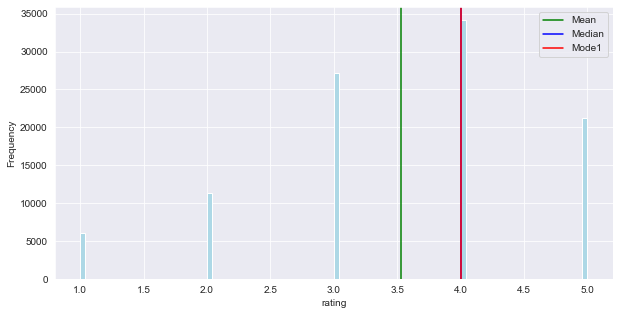

In [32]:
mean=movies_ratings_df['rating'].mean()
median=movies_ratings_df['rating'].median()
mode=movies_ratings_df['rating'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(10,5)) # set the figure size
plt.hist(movies_ratings_df['rating'],bins=100,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')     # Draw lines on the plot for mean median and the two modes we have in GRE Score
plt.axvline(median,color='blue',label='Median')
plt.axvline(mode[0],color='red',label='Mode1')

plt.xlabel('rating')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

#### 4. Find the number of movies per genre using the item data - 2.5 marks

In [57]:
#The following code to find number of movies genre in the dataset. 
movies_ratings_users_df['movie title'].value_counts().head()
(movies_df.loc[:,'unknown':'Western'].sum())

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

#### 5. Find the movies that have more than one genre - 5 marks

# Movies that have more than one genre.
* I have used two approaches to solve this question.
    * I have created two new datasets the first one (data_df) the second dataset (movie_df).
    * In the first approach finding the genre through movie id & movie title.
    * in the second approach by dropping the movie id.

In [59]:
# The following code reading creating new DataFrame.
data_df=pd.read_csv('item.csv')
data_df['movie id']=data_df['movie id'].astype('object')
data_df.loc[data_df.sum(axis=1, numeric_only=True)>1, ['movie id', 'movie title']]


,movie id,movie title
0,1,Toy Story
1,2,GoldenEye
3,4,Get Shorty
4,5,Copycat
6,7,Twelve Monkeys
...,...,...
1667,1669,MURDER and murder
1668,1670,Tainted
1671,1673,Mirage
1677,1679,B. Monkey


In [38]:
# the following code i've created a new dataset called 'movie_df' and droped 'movie id'.
movie_df=pd.read_csv('item.csv')
movie_df=movie_df.drop('movie id', axis=1)
movie_df.sum(axis=1)

0       3
1       3
2       1
3       3
4       3
       ..
1676    1
1677    2
1678    2
1679    1
1680    1
Length: 1681, dtype: int64

#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [61]:
#Indentifying index and movie title of move where the genre is unknown.
unknown = movies_df.loc[movies_df.unknown==1,'movie title']
print(unknown)

1371    Good Morning 
Name: movie title, dtype: object


In [62]:
#Creating a new dataFrame(movie_df) by dropping movie where genre unknown
movie_df= movies_df.drop(index=1371)

In [63]:
# Printing the shape of the net dataframe after droping movie where genre unknown.
movie_df.shape

(1680, 22)

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [64]:
# HINT: use distplot for age and countplot for gender,ratings,occupation, release year.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below.

## Ploting of columns: Rating', 'Age', 'Release year', 'Gender' and Occupation.

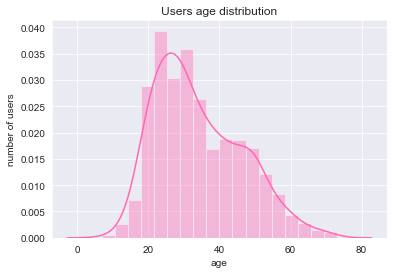

In [65]:
# The following code plots defrent age distributions.  
sns.distplot(users_df['age'],color='hotpink')
plt.title('Users age distribution')
plt.ylabel('number of users')
plt.show()


### All variables are skewed. the only variable that is closed to the normal ditribution are slightly left skewed.

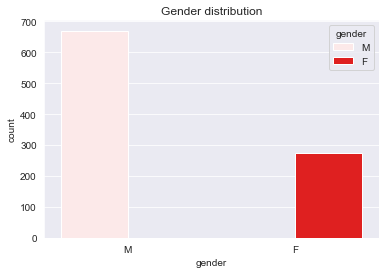

In [66]:
# the following code plots gender distirbutions.
sns.countplot(users_df['gender'], hue=users_df['gender'],color='red')
plt.title('Gender distribution')
plt.show()

### The counterplot shows that the males has higher rating distribution than the females.

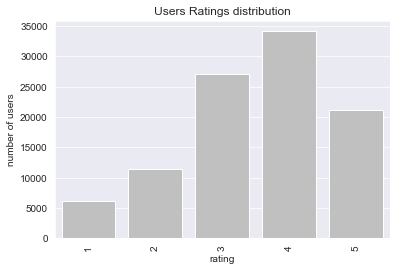

In [32]:
# the following code plots ratings distirbutions.
sns.countplot(movies_ratings_users_df['rating'],color='silver')
plt.title('Users Ratings distribution')
plt.xticks(rotation=90)
plt.ylabel('number of users')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text xticklabel objects>)

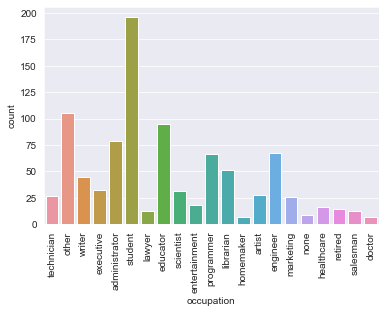

In [68]:
# the following code plots occupation distirbutions.
sns.countplot(users_df['occupation'])
plt.xticks(rotation=90)


### * The students have more rating distribution among all occupations and the doctors a less.

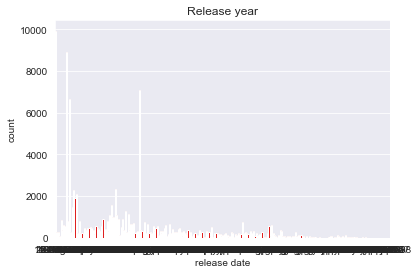

In [33]:
# the following code plots release year distirbutions.
sns.countplot(movies_ratings_users_df['release date'],color='red')
plt.title('Release year')
plt.ylabel('count')
plt.show()

# How to get release year from release date?

In [34]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


In [35]:
# the code is getting year from the release date.
year = movies_df['release date'].str.slice(-2)
year

0       95
1       95
2       95
3       95
4       95
        ..
1676    98
1677    98
1678    98
1679    94
1680    96
Name: release date, Length: 1681, dtype: object

In [36]:
# the following code to add column 'year' to the item = movies_df data frame.
movies_df['release year'] = year
print (movies_df['release date'])

0       1-Jan-95
1       1-Jan-95
2       1-Jan-95
3       1-Jan-95
4       1-Jan-95
          ...   
1676    6-Feb-98
1677    6-Feb-98
1678    1-Jan-98
1679    1-Jan-94
1680    8-Mar-96
Name: release date, Length: 1681, dtype: object


### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use multiple bivariate plots or can use the heatmap to visualise all the changes over the years in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

## Visualizing popularity of genres changing over the years.

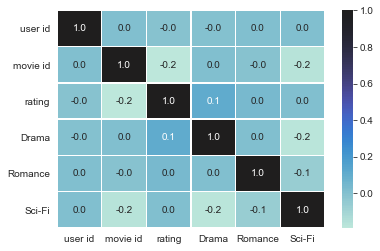

<Figure size 864x576 with 0 Axes>

In [39]:
# The following code plots popularity of genres changing over the years
movie_df.groupby(by=['release date'])['movie title'].sum().reset_index().sort_values(['release date'])
sns.heatmap(movies_ratings_users_df.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 ) 
#plt.figure(figsize=(8,6))
plt.figure(figsize=(12, 8))
plt.show() 




### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 

1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie id in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the ids and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [52]:
# The following code to get the average. 
rating_avg = movies_ratings_df.groupby('movie title')['rating'].mean()
rating_avg.head()

movie title
'Til There Was You     2.333333
1-900                  2.600000
101 Dalmatians         2.908257
12 Angry Men           4.344000
187                    3.024390
Name: rating, dtype: float64

In [53]:
# The following code groupby gender & ratings by gender.
ratings_by_gender = movies_ratings_users_df[['gender','rating']].groupby('gender').count()
ratings_by_gender

,rating
gender,
F,25738
M,74253


In [54]:
# The following code counts the total ratings by gender.
movies_rated=movies_ratings_users_df[['gender','Drama', 'Romance', 'Sci-Fi']].groupby('gender').sum()
movies_rated


,Drama,Romance,Sci-Fi
gender,,,
F,11008,5858,2629
M,28887,13603,10101


In [55]:
# The following rating avg.
rating_avg = rating_avg.sort_values(ascending=False)
rating_avg.head()

movie title
Someone Else's America                  5.0
Marlene Dietrich: Shadow and Light (    5.0
Great Day in Harlem, A                  5.0
Santa with Muscles                      5.0
Saint of Fort Washington, The           5.0
Name: rating, dtype: float64

In [63]:
# The following code couting movies rating avrage.
rating_avg_count = pd.DataFrame(data=rating_avg)
rating_avg_count['number_of_ratings'] =pd.DataFrame(rating_count)
rating_avg_count.head()

,rating,number_of_ratings
movie title,,
Someone Else's America,5.0,1
Marlene Dietrich: Shadow and Light (,5.0,1
"Great Day in Harlem, A",5.0,1
Santa with Muscles,5.0,2
"Saint of Fort Washington, The",5.0,2


In [57]:
# The folloing code display basics count statistics. 
rating_avg_count.describe()

,rating
count,1658.000000
mean,3.076198
std,0.781030
min,1.000000
25%,2.661950
50%,3.161528
75%,3.651555
max,5.000000


# Top 25 movies according to average ratings.

In [58]:
# The following code displays the top 25 movies.
rating_count = movies_ratings_users_df.groupby('movie title') ['rating']
rating_count = rating_count.count().sort_values(ascending=False)
rating_count[:25]

movie title
Star Wars                              583
Contact                                509
Fargo                                  508
Return of the Jedi                     507
Liar Liar                              485
English Patient, The                   481
Scream                                 478
Toy Story                              452
Air Force One                          431
Independence Day (ID4)                 429
Raiders of the Lost Ark                420
Godfather, The                         413
Pulp Fiction                           394
Twelve Monkeys                         392
Silence of the Lambs, The              390
Jerry Maguire                          384
Chasing Amy                            379
Rock, The                              378
Empire Strikes Back, The               367
Star Trek: First Contact               365
Back to the Future                     350
Titanic                                350
Mission: Impossible                    344

# Movies that have more than 100 ratings.

In [64]:
#The following code displays movies that have more than 100 ratings.
filter_data = rating_avg_count[rating_avg_count['number_of_ratings'] > 100]
filter_data[:25]

,rating,number_of_ratings
movie title,,
"Close Shave, A",4.491071,112
Schindler's List,4.466443,298
"Wrong Trousers, The",4.466102,118
Casablanca,4.456790,243
"Shawshank Redemption, The",4.445230,283
Rear Window,4.387560,209
"Usual Suspects, The",4.385768,267
Star Wars,4.358491,583
12 Angry Men,4.344000,125


In [65]:
# # the following code shows std viewership ratings of the movies by Female and Male.
movies_ratings_users_df.groupby('gender').rating.std()


gender
F    1.170989
M    1.109549
Name: rating, dtype: float64

 ### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [66]:
# The following code count male ratings by percentage.
maile_ratings = pd.DataFrame({'Male Ratings %':movies_rated.loc['M',:].div(ratings_by_gender.loc['M', 'rating'])*100}).round()
maile_ratings.head().T

,Drama,Romance,Sci-Fi
Male Ratings %,39.0,18.0,14.0


In [67]:
# The following code count female ratings by percentage.
female_ratings = pd.DataFrame({'Female Ratings %':movies_rated.loc['F',:].div(ratings_by_gender.loc['F', 'rating'])*100}).round()
female_ratings.head().T

,Drama,Romance,Sci-Fi
Female Ratings %,43.0,23.0,10.0


#### Conclusion:



1- The percentage of men waching less dramer then women

2- The percentage of women waching Sci-Fi is less the that among men.

3- The percentage of men waching romance is less then that among wemen.

4- The interesting thing in my observation that the standard deviation in females is slightly bigger than that in males which indicates that the difference among females ratings is greater than that among males. 

# References

1- https://docs.python.org/3/library/datatypes.html

2- https://realpython.com/pandas-groupby/

3- https://www.w3schools.com/python/default.asp

4- https://pandas.pydata.org/docs/getting_started/overview.html?highlight=saving%20loading

5- https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html?highlight=open%20csv%20file#io-read-csv-table

6-https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

7- https://pandas.pydata.org/pandas-docs/version/0.23/dsintro.html

8- https://www.youtube.com/watch?v=iYWKfUOtGaw&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=32

9- https://realpython.com/pandas-groupby/

10-https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html

11-https://stackoverflow.com/questions/33957720/how-to-convert-column-with-dtype-as-object-to-string-in-pandas-dataframe

# GitHub  Repository.

https://github.com/command20/This-repository-records-all-the-project-works-that-I-did-in-my-PGP-AIML-program-with-UT-Austin-and-G